In [74]:
import os
import json
from PIL import Image, ImageDraw
from pycocotools.coco import COCO

# COCO 标注数据读取 

In [89]:
data_type ='train' # 'dev'#

COCO_ann_val_path = 'data/COCO/instances_val2017.json'

# ann_json = COCO(ann_val_path)

# ann_path = 'data/annotations/dev.json'
with open(COCO_ann_val_path,mode = 'r',encoding='utf-8') as f:
    COCO_ann_val_json = json.load(f)

ann_json =  COCO_ann_val_json
print(f"train_ann_json type ={type(ann_json)},\nkeys={ann_json.keys()}\ninfo={ann_json['info']}\n\
licenses={ann_json['licenses']}\ncategories={ann_json['categories']}\n\
image size = {ann_json['images'].__len__()}\nannotations size={ann_json['annotations'].__len__()}")

train_ann_json type =<class 'dict'>,
keys=dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])
info={'description': 'COCO 2017 Dataset', 'url': 'http://cocodataset.org', 'version': '1.0', 'year': 2017, 'contributor': 'COCO Consortium', 'date_created': '2017/09/01'}
licenses=[{'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/', 'id': 1, 'name': 'Attribution-NonCommercial-ShareAlike License'}, {'url': 'http://creativecommons.org/licenses/by-nc/2.0/', 'id': 2, 'name': 'Attribution-NonCommercial License'}, {'url': 'http://creativecommons.org/licenses/by-nc-nd/2.0/', 'id': 3, 'name': 'Attribution-NonCommercial-NoDerivs License'}, {'url': 'http://creativecommons.org/licenses/by/2.0/', 'id': 4, 'name': 'Attribution License'}, {'url': 'http://creativecommons.org/licenses/by-sa/2.0/', 'id': 5, 'name': 'Attribution-ShareAlike License'}, {'url': 'http://creativecommons.org/licenses/by-nd/2.0/', 'id': 6, 'name': 'Attribution-NoDerivs License'}, {'url': 'http://flickr.com/

In [91]:
image_size = COCO_ann_val_json['images'].__len__()

image_index=image_size-1
images =COCO_ann_val_json['images']
annotations = COCO_ann_val_json['annotations']

print(f"images[{image_index}]\n{images[image_index]}")
print(f"annotations[{image_index}]\n{annotations[image_index]}")

images[4999]
{'license': 2, 'file_name': '000000015335.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000015335.jpg', 'height': 480, 'width': 640, 'date_captured': '2013-11-25 14:00:10', 'flickr_url': 'http://farm6.staticflickr.com/5533/10257288534_c916fafd78_z.jpg', 'id': 15335}
annotations[4999]
{'segmentation': [[365.65, 291.76, 378.83, 288.21, 387.45, 278.07, 389.48, 274.52, 384.91, 265.4, 383.9, 255.77, 394.04, 249.18, 397.59, 251.21, 400.12, 255.26, 402.66, 265.91, 402.66, 272.5, 409.25, 281.62, 411.27, 289.73, 412.79, 298.85, 406.71, 300.37, 399.61, 300.88, 392.01, 301.39, 380.35, 307.47, 377.31, 317.1, 371.74, 325.72, 363.63, 328.76, 361.6, 323.69, 369.2, 316.09, 376.8, 309.5, 388.97, 296.32, 386.94, 292.77, 366.16, 298.85, 364.13, 295.81, 364.13, 294.29]], 'area': 1330.609900000001, 'iscrowd': 0, 'image_id': 534827, 'bbox': [361.6, 249.18, 51.19, 79.58], 'category_id': 1, 'id': 232474}


# 使用 COCO API：读取自制coco数据集 

In [92]:
# 使用 COCO API
data_type ='train' # 'dev'#

ann_path = f'data/annotations/{data_type}.json'
ann_json = COCO(ann_path)

loading annotations into memory...
Done (t=0.10s)
creating index...
index created!


In [95]:
len(ann_json.dataset['categories'])

len(ann_json.dataset['annotations'])

image_size = len(ann_json.dataset['images'])
image_index=image_size-1
images =ann_json.dataset['images']
annotations = ann_json.dataset['annotations']

print(f"images[{image_index}]\n{images[image_index]}")
print(f"annotations[{image_index}]\n{annotations[image_index]}")


images[4999]
{'id': '000000005000', 'width': 2048, 'height': 2898, 'file_name': '000000005000.png', 'license': 1, 'date_captured': '2021-01-18 10:28:38'}
annotations[4999]
{'id': 0, 'image_id': '000000005000', 'category_id': 1, 'segmentation': [[1471, 800, 1742, 800, 1742, 1071, 1471, 1071]], 'area': 73441, 'bbox': [1471, 800, 271, 271], 'iscrowd': 0}


# 直接读取自制coco数据集

In [94]:
data_type ='train' # 'dev'#
ann_path = f'data/annotations/{data_type}.json'

# ann_path = 'data/annotations/dev.json'
# with open(ann_path,mode = 'r',encoding='utf-8') as f:
#     ann_json = json.load(f)
# 
# print(f"train_ann_json type ={type(ann_json)},\nkeys={ann_json.keys()}\ninfo={ann_json['info']}\n\
# licenses={ann_json['licenses']}\ncategories={ann_json['categories']}\n\
# image size = {ann_json['images'].__len__()}\nannotations size={ann_json['annotations'].__len__()}")

In [64]:
image_size = ann_json['images'].__len__()

image_index=image_size-1

image_size = ann_json['images'].__len__()
images =ann_json['images']
annotations = ann_json['annotations']

print(f"images[{image_index}]\n{images[image_index]}")
print(f"annotations[{image_index}]\n{annotations[image_index]}")

images[4999]
{'id': '000000005000', 'width': 2048, 'height': 2898, 'file_name': '000000005000.png', 'license': 1, 'date_captured': '2021-01-18 10:28:38'}
annotations[4999]
{'id': 0, 'image_id': '000000005000', 'category_id': 1, 'segmentation': [[1471, 800, 1742, 800, 1742, 1071, 1471, 1071]], 'area': 73441, 'bbox': [1471, 800, 271, 271], 'iscrowd': 0}


In [69]:
test_image_info = images[image_index]
test_image_filename = test_image_info['file_name']
test_annotation = annotations[image_index]
test_annotation_bbox = test_annotation['bbox']

image_dir = f'data/dev'
test_image_path = os.path.join(image_dir,test_image_filename)

test_img = Image.open(test_image_path)
# test_img

In [67]:
x,y,w,h = test_annotation_bbox
x,y,w,h
img_copyed = test_img.copy()
img_draw = ImageDraw.Draw(img_copyed)
x1,y1 = x,y
x2,y2 = x+h,y
x3,y3 = x+h,y+h
x4,y4 = x,y+h
x3,y3

(1742, 1071)

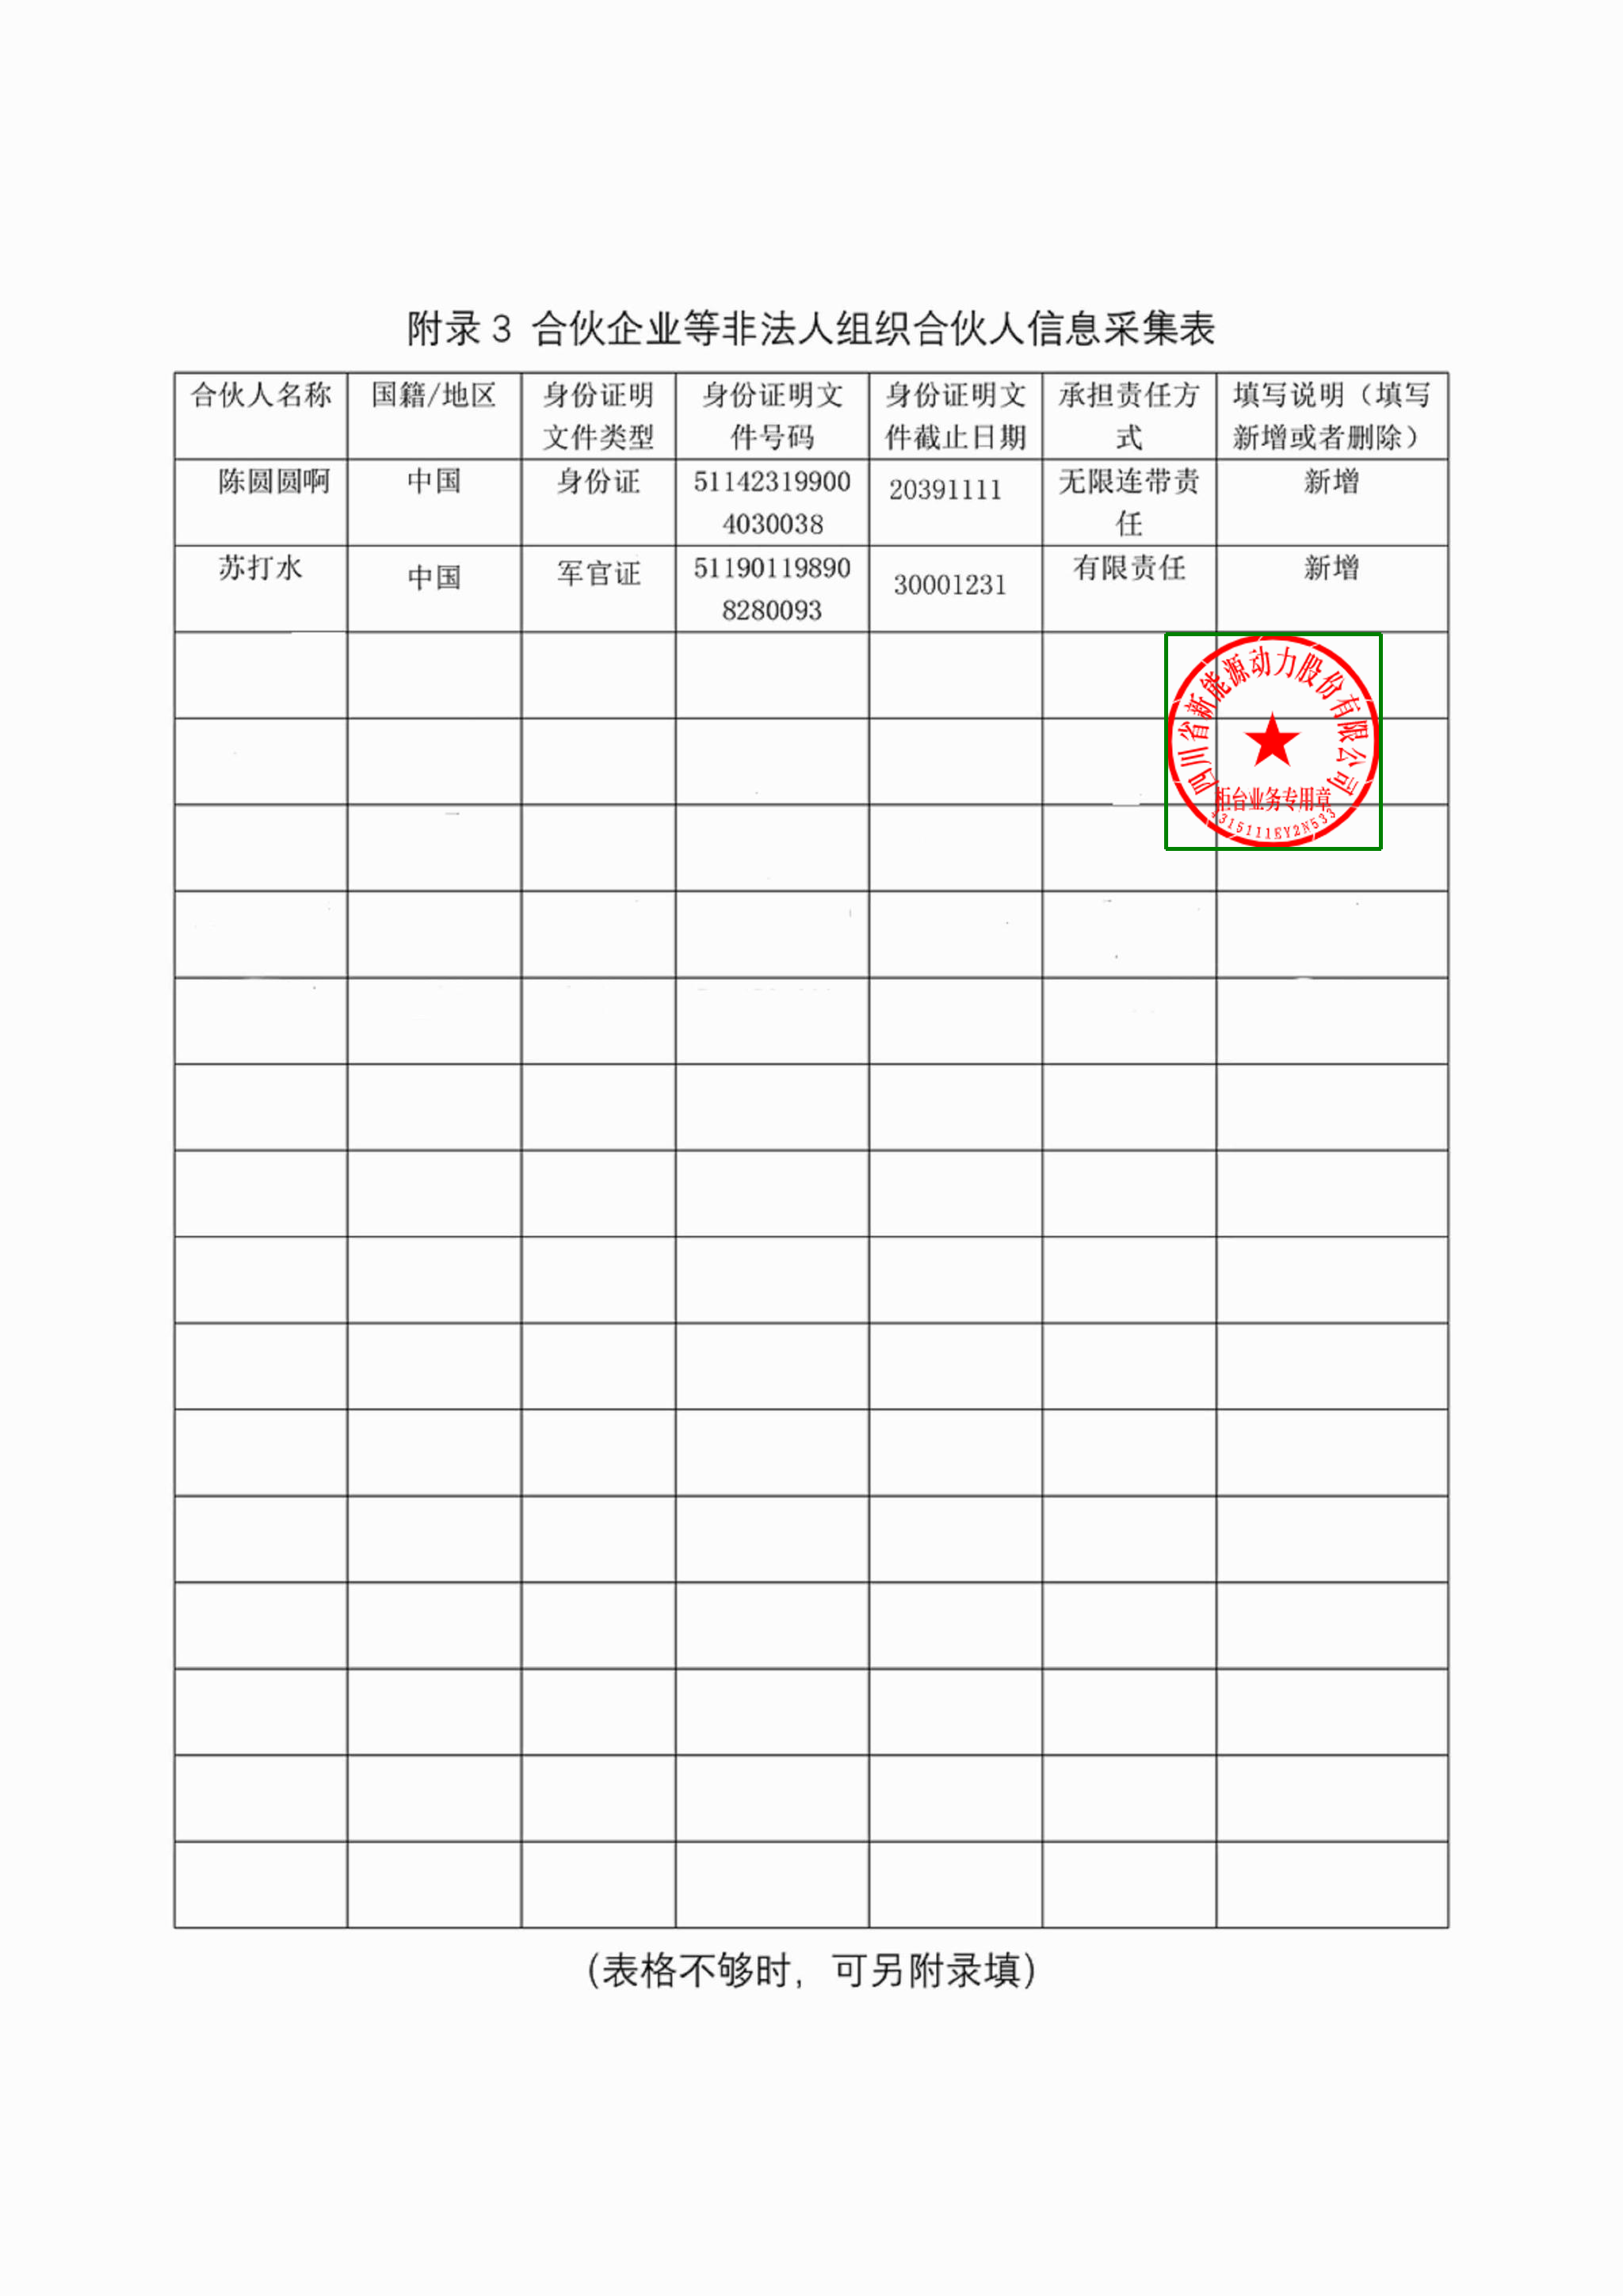

In [68]:
for xy in [(x1, y1, x2, y2), (x2, y2, x3, y3), (x3, y3, x4, y4), (x4, y4, x1, y1)]:
    img_draw.line(xy=xy, fill='green', width=5)
img_copyed